# Data Visualization Part2
#### Author: Dr Abdulkarim M. Jamal Kanaan Jebna
<hr>

#### repeat the steps done in the previous visualization tutorial

*however; you need to find the least 5 countries and compare their trends*

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

years = list(map(str, range(1980, 2014)))

df = pd.read_excel(io="Canada.xlsx", sheet_name='Canada by Citizenship', skipfooter=2)

df = df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [11]:
# write your code in here; save the final result into countries



In [12]:
# draw the figure....



output should look like this:

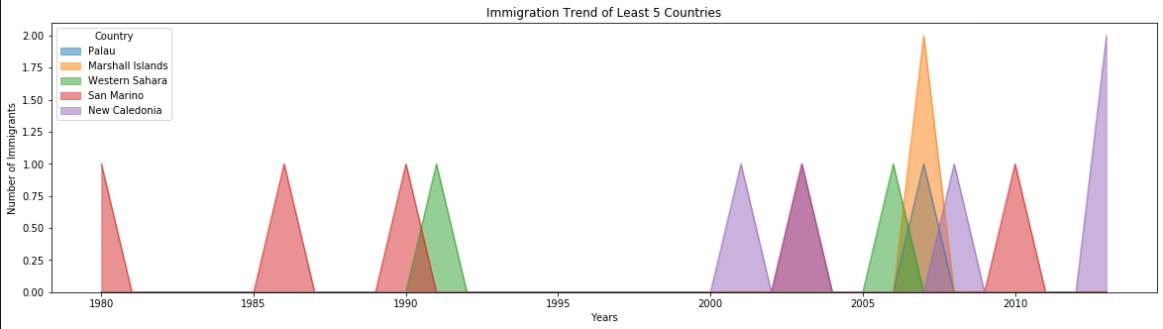

<hr>

## Histograms

Histograms can be used when needed to show frequency distribution. It works as follow: (1) partitions x-axis to bins (2) assigns each data point to a bin (3) counts the number of data points assigned to each bin. 

***NOTE*** bin size can be changed; it is preferrable to have a neat (nice) distribution


In [16]:
df['Total'] = df.loc[:, 1980:2013].sum(axis=1)
df = df.set_index("Country")

df.columns = list(map(str, df.columns))

countries = df.sort_values(by='Total', ascending=True)
countries.head()

countries['2013']

Country
Palau                                                       0
Marshall Islands                                            0
Western Sahara                                              0
San Marino                                                  0
New Caledonia                                               2
                                                        ...  
Pakistan                                                12603
Philippines                                             29544
United Kingdom of Great Britain and Northern Ireland     5827
China                                                   34129
India                                                   33087
Name: 2013, Length: 195, dtype: int64

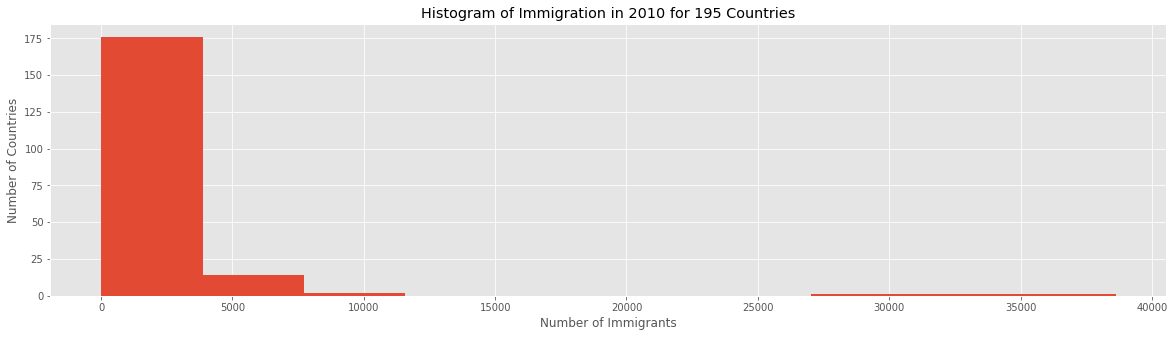

In [17]:
countries['2010'].plot(kind='hist', figsize=(20, 5))

plt.title('Histogram of Immigration in 2010 for 195 Countries')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

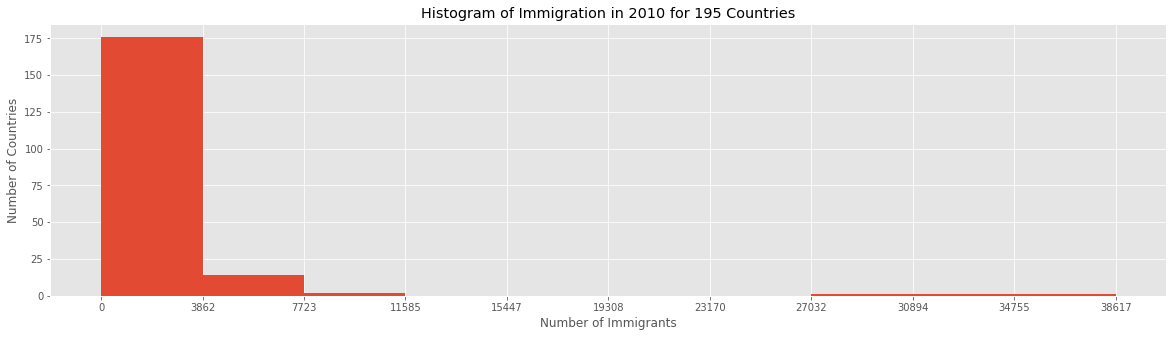

In [18]:
count, bin_edges = np.histogram(countries['2010'])

countries['2010'].plot(kind='hist', figsize=(20, 5), xticks=bin_edges)

plt.title('Histogram of Immigration in 2010 for 195 Countries') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

<hr>

## Bar Charts

In [19]:
syria = countries.loc['Syrian Arab Republic', years]
syria.head()

1980    315
1981    419
1982    409
1983    269
1984    264
Name: Syrian Arab Republic, dtype: object

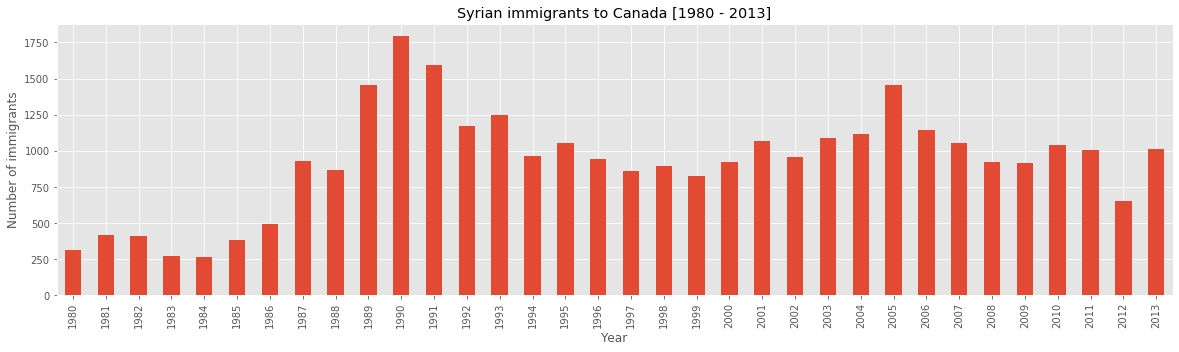

In [20]:
syria.plot(kind='bar', figsize=(20, 5))

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Syrian immigrants to Canada [1980 - 2013]') 

plt.show()

## Exercise

**Task:** show a horizontal bar plot dipicting the *total* number of immigrants from top 10 countries to Canada in between 1980 and 2013. Label each country with the total immigrant count.

In [ ]:
# write your solution here


In [ ]:
# ....


Output should look like this

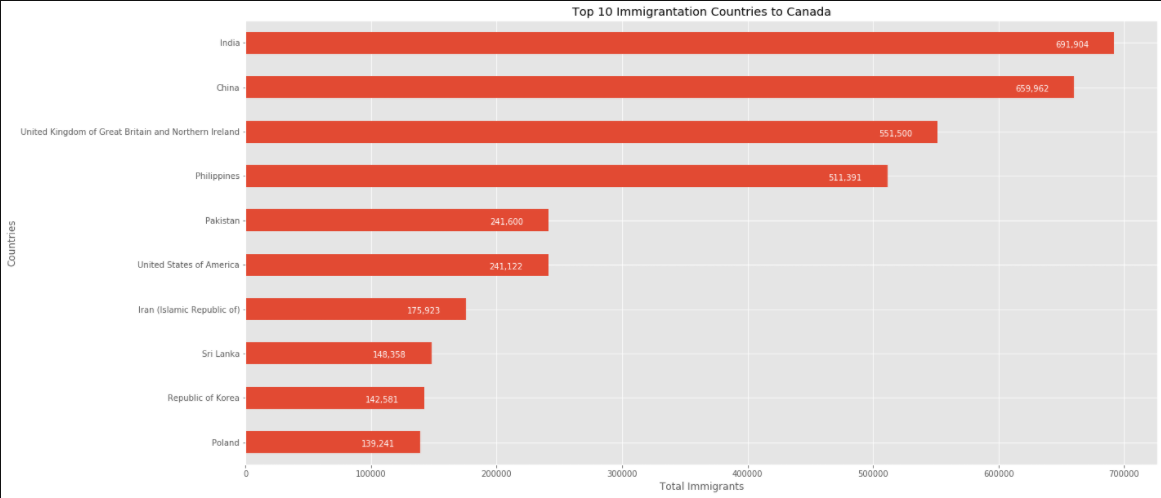

<hr>

### Box Plots


A `box plot` is useful to show the statistical distribution of the data. Box plots contain five dimensions:

* **Minimum:** is the *smallest* value exists in the dataset without the outliers
* **First Quartile:** is the *Middle* value between  the `minimum` and the `second quartile (median)`.
* **Second Quartile (Median):** is the *Middle* value of the dataset after sorting.
* **Third Quartile:** is the *Middle* value between `second quartile (median)` and `maximum`.
* **Maximum:** is the *largest* value in the dataset without the outliers.



In [21]:
df_syria = df.loc[['Syrian Arab Republic'], years].transpose()
df_syria.head()

Country,Syrian Arab Republic
1980,315
1981,419
1982,409
1983,269
1984,264


Text(0, 0.5, 'Number of Immigrants')

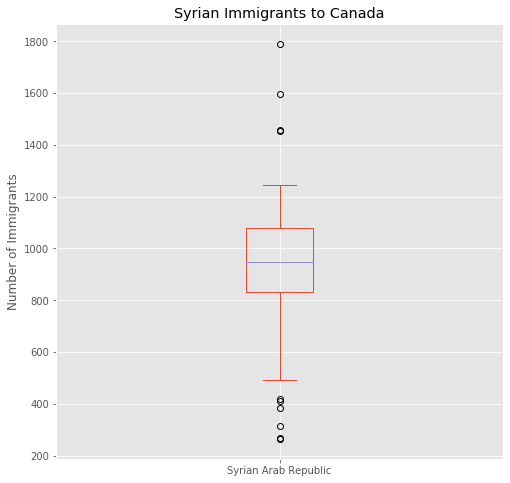

In [22]:
df_syria.plot(kind='box', figsize=(8, 8))
plt.title("Syrian Immigrants to Canada")
plt.ylabel("Number of Immigrants")

### what can we capture from the figure?

* all figures are for the period of time 1980-2013
* the minimum figure of annual immigrants is ~ 1250 (without outlier)
* the maximum figure of annual immigrants is ~ 500 (without outlier)
* mediam is ~ 950
* 1st Quartile is ~ 820
* 3rd Quartile is ~ 1000

In [23]:
df_syria.describe()

Country,Syrian Arab Republic
count,34.000000
mean,926.029412
std,367.524436
min,264.000000
25%,832.000000
50%,949.000000
75%,1080.500000
max,1791.000000


## Exercise

Task# perform distribution comparison of annual immigrants between China and India in between 1980 and 2013

In [ ]:
# write your code here

# step1: retrieve data of china and india to df_china_india
#df_china_india = ....

step1 output: 

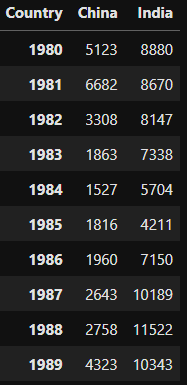

In [ ]:
df_china_india.describe()

In [ ]:
# draw plotbox


Output should look like this



<div>
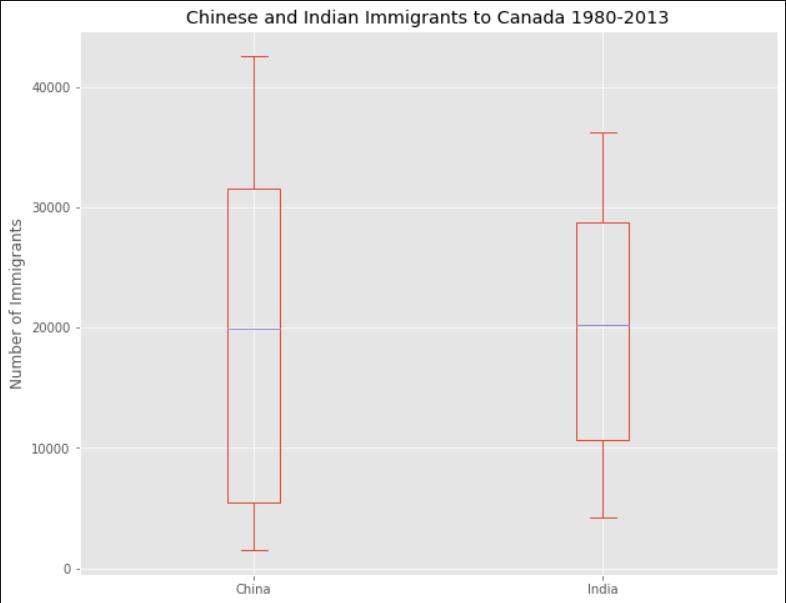
</div>



In [25]:
# shows the figure in horizontal


figure should look like this

<div>
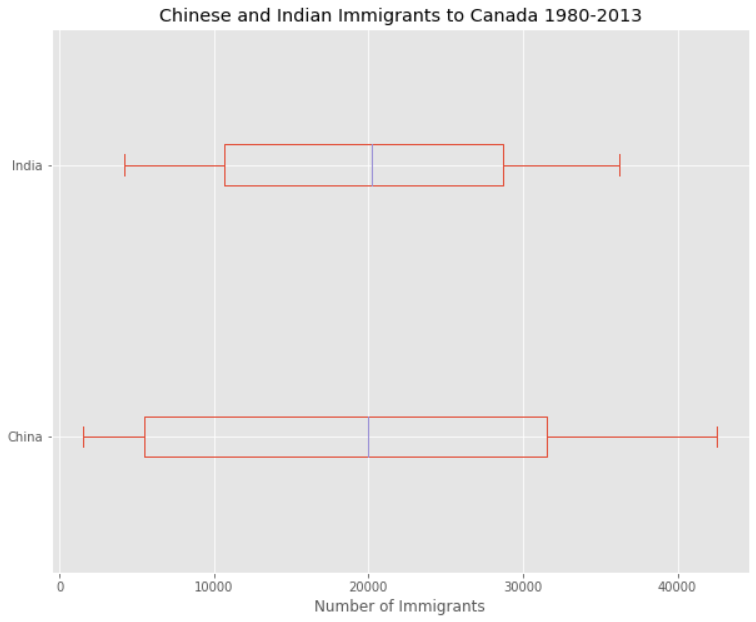
</div>

# Scatter Plots

>A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram)[3] is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data (Wiki)

`scatter plot` and `line plot` are similar as but data points in scatter are not connected. scatter can help to show the trend in the data. then we can apply analysis such as regression to caculate the relationship, then can be used to predict the trend for new data.

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

let's work on an example, we need to apply scatter plot to show the trend of Canada immigration for all countries of all time 1980-2013

In [26]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [27]:
#df_total = df[years]
df_all = df[years].transpose()
df_all.index=map(int, df_all.index)
df_all.head()



Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


In [28]:
df_total = pd.DataFrame(df_all.sum(axis=1)).reset_index()
df_total.columns=['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


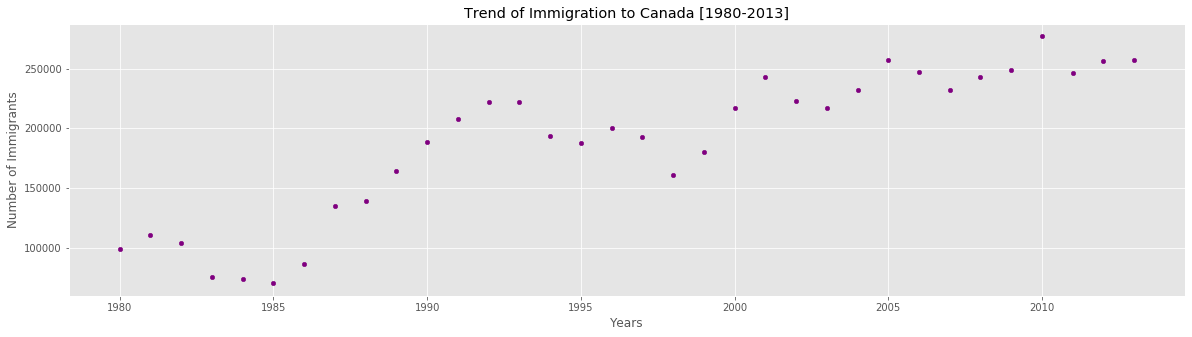

In [29]:
df_total.plot(kind='scatter', x="year", y="total", figsize=(20, 5), color='purple')
plt.title("Trend of Immigration to Canada [1980-2013]")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.show()

In [30]:
x = df_total['year'].astype(int)
y = df_total['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

C:\Users\akana\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\akana\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\akana\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(2000, 150000, 'y=5567 x + -10926195')

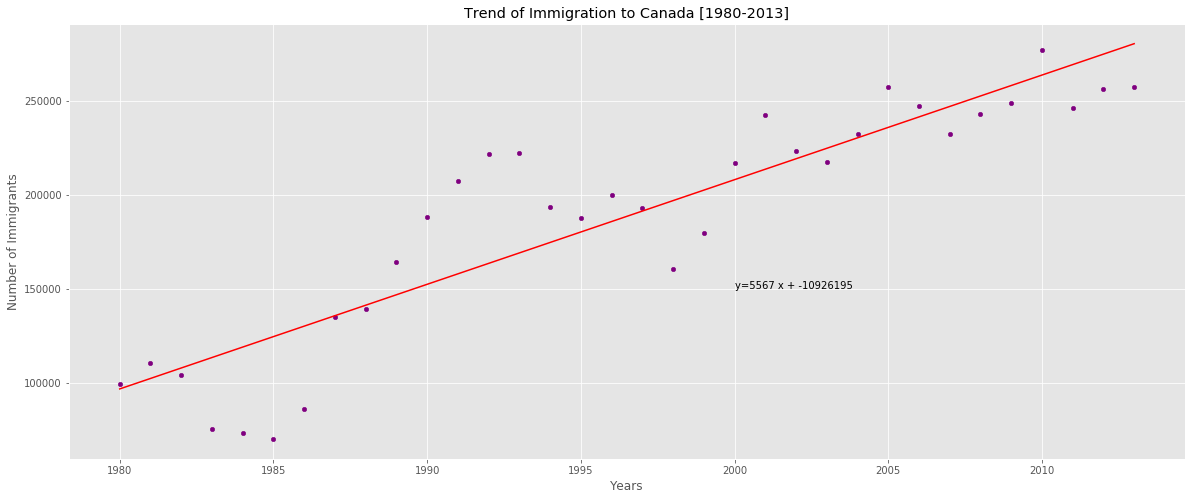

In [31]:
df_total.plot(kind='scatter', x="year", y="total", figsize=(20, 8), color='purple')
plt.title("Trend of Immigration to Canada [1980-2013]")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

#plt.plot(x, x*regression_line[0] + regression_line[1])
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
#plt.show()

## Exercise

You need to produce scatter plot for the total number of immigrants of the following countries: Yemen, Malaysia, Egypt

In [ ]:
# retrieve data for the countries


Retrieve data for the countries

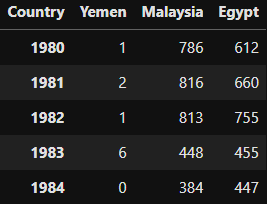

In [ ]:
# calculate the total


calculate the total column

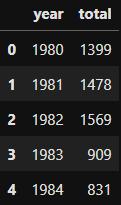

In [ ]:
# plot your figure


output should look like this

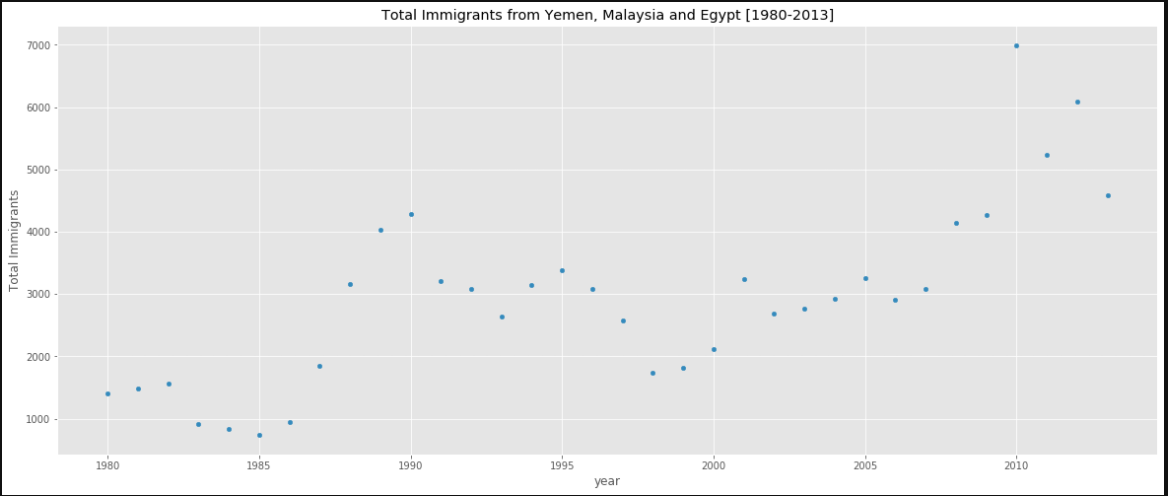

## Author

#### Abdulkarim M. Jamal Kanaan
<a href="">Linked-In</a> 
* Reference: IBM Data Science